In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

In [82]:
class signalgeneration:
    def __init__(self,*argv):

        if "cos" in argv:
            self.Fs = argv[0]
            self.N  = argv[1]
            self.SignalType = argv[2]
            self.phase0 = argv[3]
            self.CosOst = argv[4]
            self.CosAmp = argv[5]

        elif "lin" in argv:
            self.Fs = argv[0]
            self.N  = argv[1]
            self.SignalType = argv[2]
            self.Start = argv[3]
            self.End = argv[4]

        elif "motorsim" in argv:
            self.Fs = argv[0]
            self.N  = argv[1]
            self.SignalType = argv[2]
            self.StartDuration = argv[3]
            self.OperateDuration = argv[4]
            self.StopDuration = argv[5] 
            self.Kp = argv[6]
            self.taup = argv[7]
            self.max = argv[8]

        else:
            print("Error: No signal type requested available"\
                +"or not enough arguments")

    def GenerateRpm(self):
        TypeBuff = self.SignalType
        t = np.asarray(np.arange(self.N))/self.Fs
        if TypeBuff=="cos":
            rpm = self.CosOst + self.CosAmp * np.cos(np.array(t))

        elif TypeBuff=="lin":
            rpm = np.asarray(np.linspace(self.Start,self.End,\
                num=self.N))
        elif TypeBuff=="motorsim":
            # Duration is not yet defined.
            #if self.StartDuration+self.OperateDuration+\
            #    self.StopDuration == self.N/self.Fs:
            def model3(y,t):
                u=1
                return(-y + self.Kp * u)/self.taup
            y1 = odeint(model3,0,t[0:t.size//2])
            y2 = np.flip(y1)
            rpm = np.r_[y1,y2]
        else:
            print("Input error: Duration and sample don't \
                match")
        return rpm

    def rpm2vib(self,rpm,ord):
        t = np.asarray(np.arange(self.N))/self.Fs
        phase = 2 * np.pi * np.true_divide(rpm,10) 
        amp = rpm
        out = amp * np.cos(2 * np.pi * self.Fs * t + 2.5\
             + ord * rpm )
        return out
    
    def STFFT(self,out,window=1000,mmin=0,mmax=100):
        f, t, Zxx = signal.stft(out,self.Fs,nperseg=window)
        Z = np.abs(Zxx)
        plt.pcolormesh(t,f,Z,vmin=mmin,vmax=mmax)
        plt.title("STFT magnitude")
        plt.ylabel("Frequency[Hz]")
        plt.xlabel("Time[sec]")
        plt.ylim(0,200)
        plt.show()
        return Z,t,f

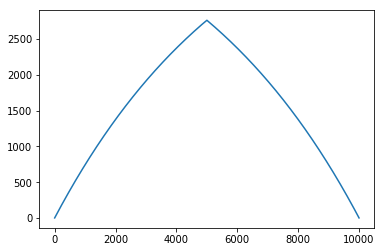

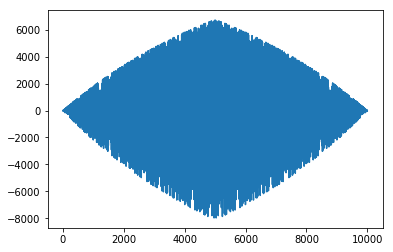

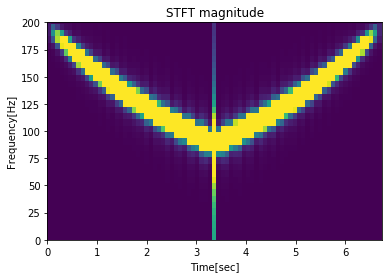

In [83]:
sg = signalgeneration(15e2,10000,"motorsim",2000,1000,2000,5000,4.14,15)
s = sg.GenerateRpm()
k = sg.rpm2vib(s.T,1)
k
plt.plot(s)
plt.show()
k1 = sg.rpm2vib(s.T,3)
k2 = sg.rpm2vib(s.T,2)
k3 = sg.rpm2vib(s.T,4.5)
k4 = k1 + k2 + k3
plt.plot(k4[0])
plt.show()
g = sg.STFFT(k[0],256,0,100)


array([[0.        , 0.80508816, 1.61004668, ..., 1.61004668, 0.80508816,
        0.        ]])